# 0 IMPORTANT

* DEPENDENCE VARIABLE: Obesity_prevalence

* En este caso se va a realizar selecbest 2 veces (uno con el fin de reducir que columnas del DF son utiles para el analisis y otro con el fin de hacer optimo el modelo)

# 1 IMPORT LIBRERIES

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
import joblib

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv', sep = ",")
df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


# 2. STUDY INFO

In [60]:
df.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


* We have 8 rows
* We have 106 columns 
* We can see that we have many numerics columns.

# 3. CATEGORIC AND NUMERIC COLUMNS

In [61]:
# Identificar el tipo de datos de cada columna
data_types = df.dtypes
# Separar las columnas categóricas y numéricas
categorical_columns = list(data_types[data_types == 'object'].index)
numeric_columns = list(data_types[data_types != 'object'].index)

print(f"Categorical_columns: {categorical_columns}")
print(f"Numeric_columns: {numeric_columns}")

Categorical_columns: ['COUNTY_NAME', 'STATE_NAME']
Numeric_columns: ['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18"

* We have only two categoric columns. 
* We must factor and normalize

# 4. FACTORIZE CATEGORIC COLUMNS

In [62]:

df["STATE_NAME"]= pd.factorize(df["STATE_NAME"])[0]
df["COUNTY_NAME"]= pd.factorize(df["COUNTY_NAME"])[0]


# 5. MANY VARIABLES / WE NEED SELECT 

* When we have many columns, sometimes intelligently reducing the number of columns helps us to improve the model. 

* Let's ask the code to select 33% of the columns it considers most related.

* To do this we must first:

1. normalize

2. Divide train and test

3. Select the variables

4. Join train and test

5. Develop the EDA.

#### 5.1. normalize

In [63]:
# Select numerical columns (excluding the target column)
num_variables = df.drop('Obesity_prevalence', axis=1).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numerical variables
scaled_features = scaler.fit_transform(df[num_variables])

# Create a scaled DataFrame with appropriate indices and columns
scaled_df = pd.DataFrame(scaled_features, index=df.index, columns=num_variables)

# Add the target column to the scaled DataFrame
scaled_df['Obesity_prevalence'] = df['Obesity_prevalence']

#### 5.2. Divide train and test

In [64]:
# Extract the features (X) and target variable (y) from the scaled DataFrame
X = scaled_df[num_variables]
y = df["Obesity_prevalence"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store the index values of the training and testing sets
train_ids = X_train.index.values
test_ids = X_test.index.values

#### 5.3. Select the variables

In [65]:
# Initialize a SelectKBest instance with k=36
selector = SelectKBest(k=36)

# Fit the selector to the training data and transform it
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_features = X_train.columns[selector.get_support()]

# Create a new test set with the selected features
X_test_selected = X_test[selected_features]

# Create filtered training and test sets with only the selected features
X_train_filtered = X_train[selected_features]
X_test_filtered = X_test[selected_features]

#### 5.4. Join Train and test

In [66]:
dtrain_combined = pd.concat([X_train_filtered, y_train], axis=1)
dtest_combined = pd.concat([X_test_filtered, y_test], axis=1)
dtrain_combined.index = train_ids
dtest_combined.index = test_ids
combo_data = pd.concat([dtrain_combined, dtest_combined])

In [67]:
combo_data.head()

,% Black-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,Two or more races pop,GQ_ESTIMATES_2018,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,...,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,Obesity_prevalence
1292,-0.557936,-0.138252,-0.427173,-0.111128,-0.216741,-0.338894,-0.232259,0.108842,0.154941,-0.293986,...,0.940367,0.845366,0.980076,0.229998,0.195197,0.299632,0.622848,0.554308,0.635465,38.6
2302,-0.565467,-0.135016,-0.386454,-0.106109,-0.198513,-0.189969,-0.190434,-0.506607,1.962510,-0.421202,...,0.343248,0.222683,0.406134,0.009727,-0.071720,0.051790,0.094650,-0.014244,0.146046,33.2
761,-0.382979,-0.131301,-0.179106,-0.107934,-0.207537,0.364583,-0.225012,-0.411923,1.322909,-0.580221,...,0.044689,0.031088,-0.014757,-0.320679,-0.338638,-0.337677,-0.961748,-0.961830,-0.995931,33.7
2194,-0.557130,-0.109059,-0.022810,-0.080102,0.441434,-0.202790,-0.089371,-0.869564,-0.206573,0.289084,...,-0.424476,-0.352101,-0.435648,-0.687797,-0.643687,-0.727143,-0.785681,-0.772313,-0.832792,36.5
1241,0.125315,-0.048532,0.503757,-0.088315,0.168924,0.260828,-0.032765,-0.711757,0.293985,-0.039556,...,0.215294,0.270582,0.214820,-0.210544,-0.147983,-0.231458,-0.081417,-0.014244,-0.180233,37.5


In [68]:
combo_data.describe()

,% Black-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,Two or more races pop,GQ_ESTIMATES_2018,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,...,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,Obesity_prevalence
count,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,...,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000
mean,-9.673790e-17,-5.657187e-18,-3.960031e-18,-7.920062e-18,-1.584012e-17,1.357725e-17,-1.810300e-17,-7.693775e-17,1.233267e-16,-1.504812e-16,...,1.255896e-16,-4.073175e-17,-5.657187e-16,-6.551023e-16,1.866872e-16,1.787671e-16,-5.826903e-16,-6.347364e-16,-8.406580e-16,35.019299
std,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,...,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,4.517088
min,-6.453725e-01,-1.402798e-01,-5.441889e-01,-1.161465e-01,-2.570757e-01,-3.840629e-01,-2.749606e-01,-1.926874e+00,-4.002468e+00,-2.287028e+00,...,-2.386438e+00,-2.363847e+00,-2.387051e+00,-2.560101e+00,-2.512111e+00,-2.603662e+00,-2.898476e+00,-2.857003e+00,-2.953608e+00,15.200000
25%,-5.854755e-01,-1.389808e-01,-3.811792e-01,-1.138652e-01,-2.408334e-01,-3.580123e-01,-2.598939e-01,-7.275375e-01,-6.237043e-01,-6.968354e-01,...,-7.656868e-01,-7.352910e-01,-7.417502e-01,-6.877974e-01,-6.818182e-01,-6.917368e-01,-6.096153e-01,-5.827958e-01,-6.696521e-01,32.400000
50%,-4.695338e-01,-1.362462e-01,-2.853625e-01,-1.088463e-01,-2.175979e-01,-2.929046e-01,-2.352425e-01,-2.067730e-01,4.370580e-02,-2.462807e-01,...,-8.326521e-02,-6.470902e-02,-5.301959e-02,-1.004080e-01,-1.098516e-01,-8.983434e-02,-8.141661e-02,-1.424397e-02,-1.709330e-02,35.400000
75%,1.042863e-01,-1.205389e-01,-4.240553e-02,-8.466450e-02,-1.219937e-01,-4.943053e-02,-1.433599e-01,5.980449e-01,6.972115e-01,4.269010e-01,...,6.418077e-01,6.537716e-01,6.357110e-01,6.338287e-01,6.146395e-01,6.536922e-01,6.228483e-01,5.543079e-01,6.354655e-01,37.900000
max,5.300319e+00,3.522569e+01,1.449180e+01,4.280838e+01,2.800989e+01,2.620078e+01,2.702472e+01,8.346389e+00,2.963625e+00,6.034981e+00,...,4.608383e+00,4.725162e+00,4.461992e+00,4.598707e+00,4.618406e+00,4.583761e+00,4.848438e+00,4.913206e+00,4.713958e+00,49.900000


* We now have 8 rows × 37 columns

#### 5.5. Exploratory Data Analysis

#### 5.5.1 Numerics graphics

In [69]:
import seaborn as sns
def graficos_eda_numericos(cat):
    # Filtrar las columnas numéricas
    cat_numericas = cat.select_dtypes(include='number')

    # Calculamos el número de filas y columnas necesarias para los subplots
    num_filas = len(cat_numericas.columns)
    num_columnas = 2  # Histograma y Boxplot

    # Definimos el gráfico con el número adecuado de subplots
    f, ax = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(16, num_filas * 6))

    # Aplanamos los ejes para iterar a través de ellos como si fueran un arreglo unidimensional
    ax = ax.flat

    # Creamos un bucle que añade histogramas y boxplots para cada variable numérica
    for cada, variable in enumerate(cat_numericas):
        # Histograma
        sns.histplot(cat_numericas[variable], ax=ax[cada*num_columnas], bins=20, kde=True)
        ax[cada*num_columnas].set_title(f'Histograma: {variable}', fontsize=12, fontweight="bold")
        ax[cada*num_columnas].tick_params(labelsize=12)

        # Boxplot
        sns.boxplot(x=cat_numericas[variable], ax=ax[cada*num_columnas+1], orient='h')
        ax[cada*num_columnas+1].set_title(f'Boxplot: {variable}', fontsize=12, fontweight="bold")
        ax[cada*num_columnas+1].tick_params(labelsize=12)

    # Ajustamos el espacio entre los subplots para una mejor visualización
    plt.tight_layout()

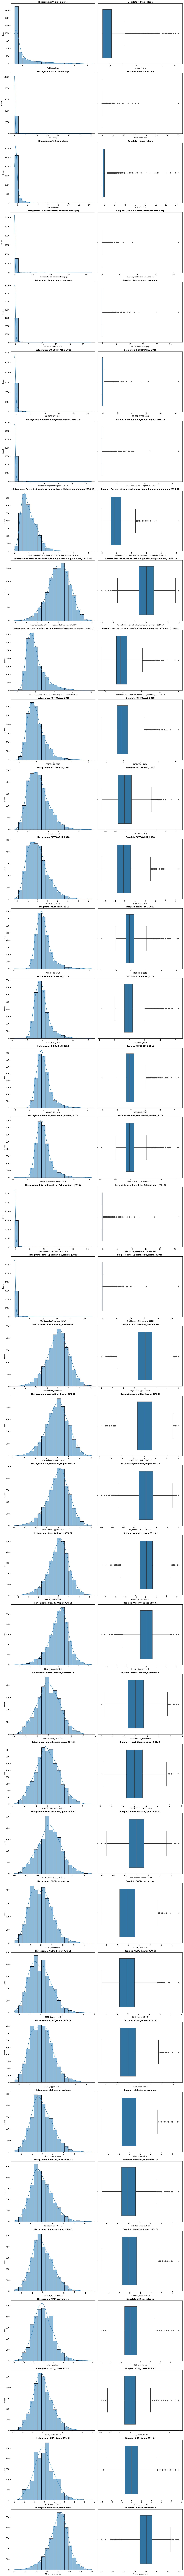

In [70]:
graficos_eda_numericos(combo_data)

#### 5.5.2 hot map

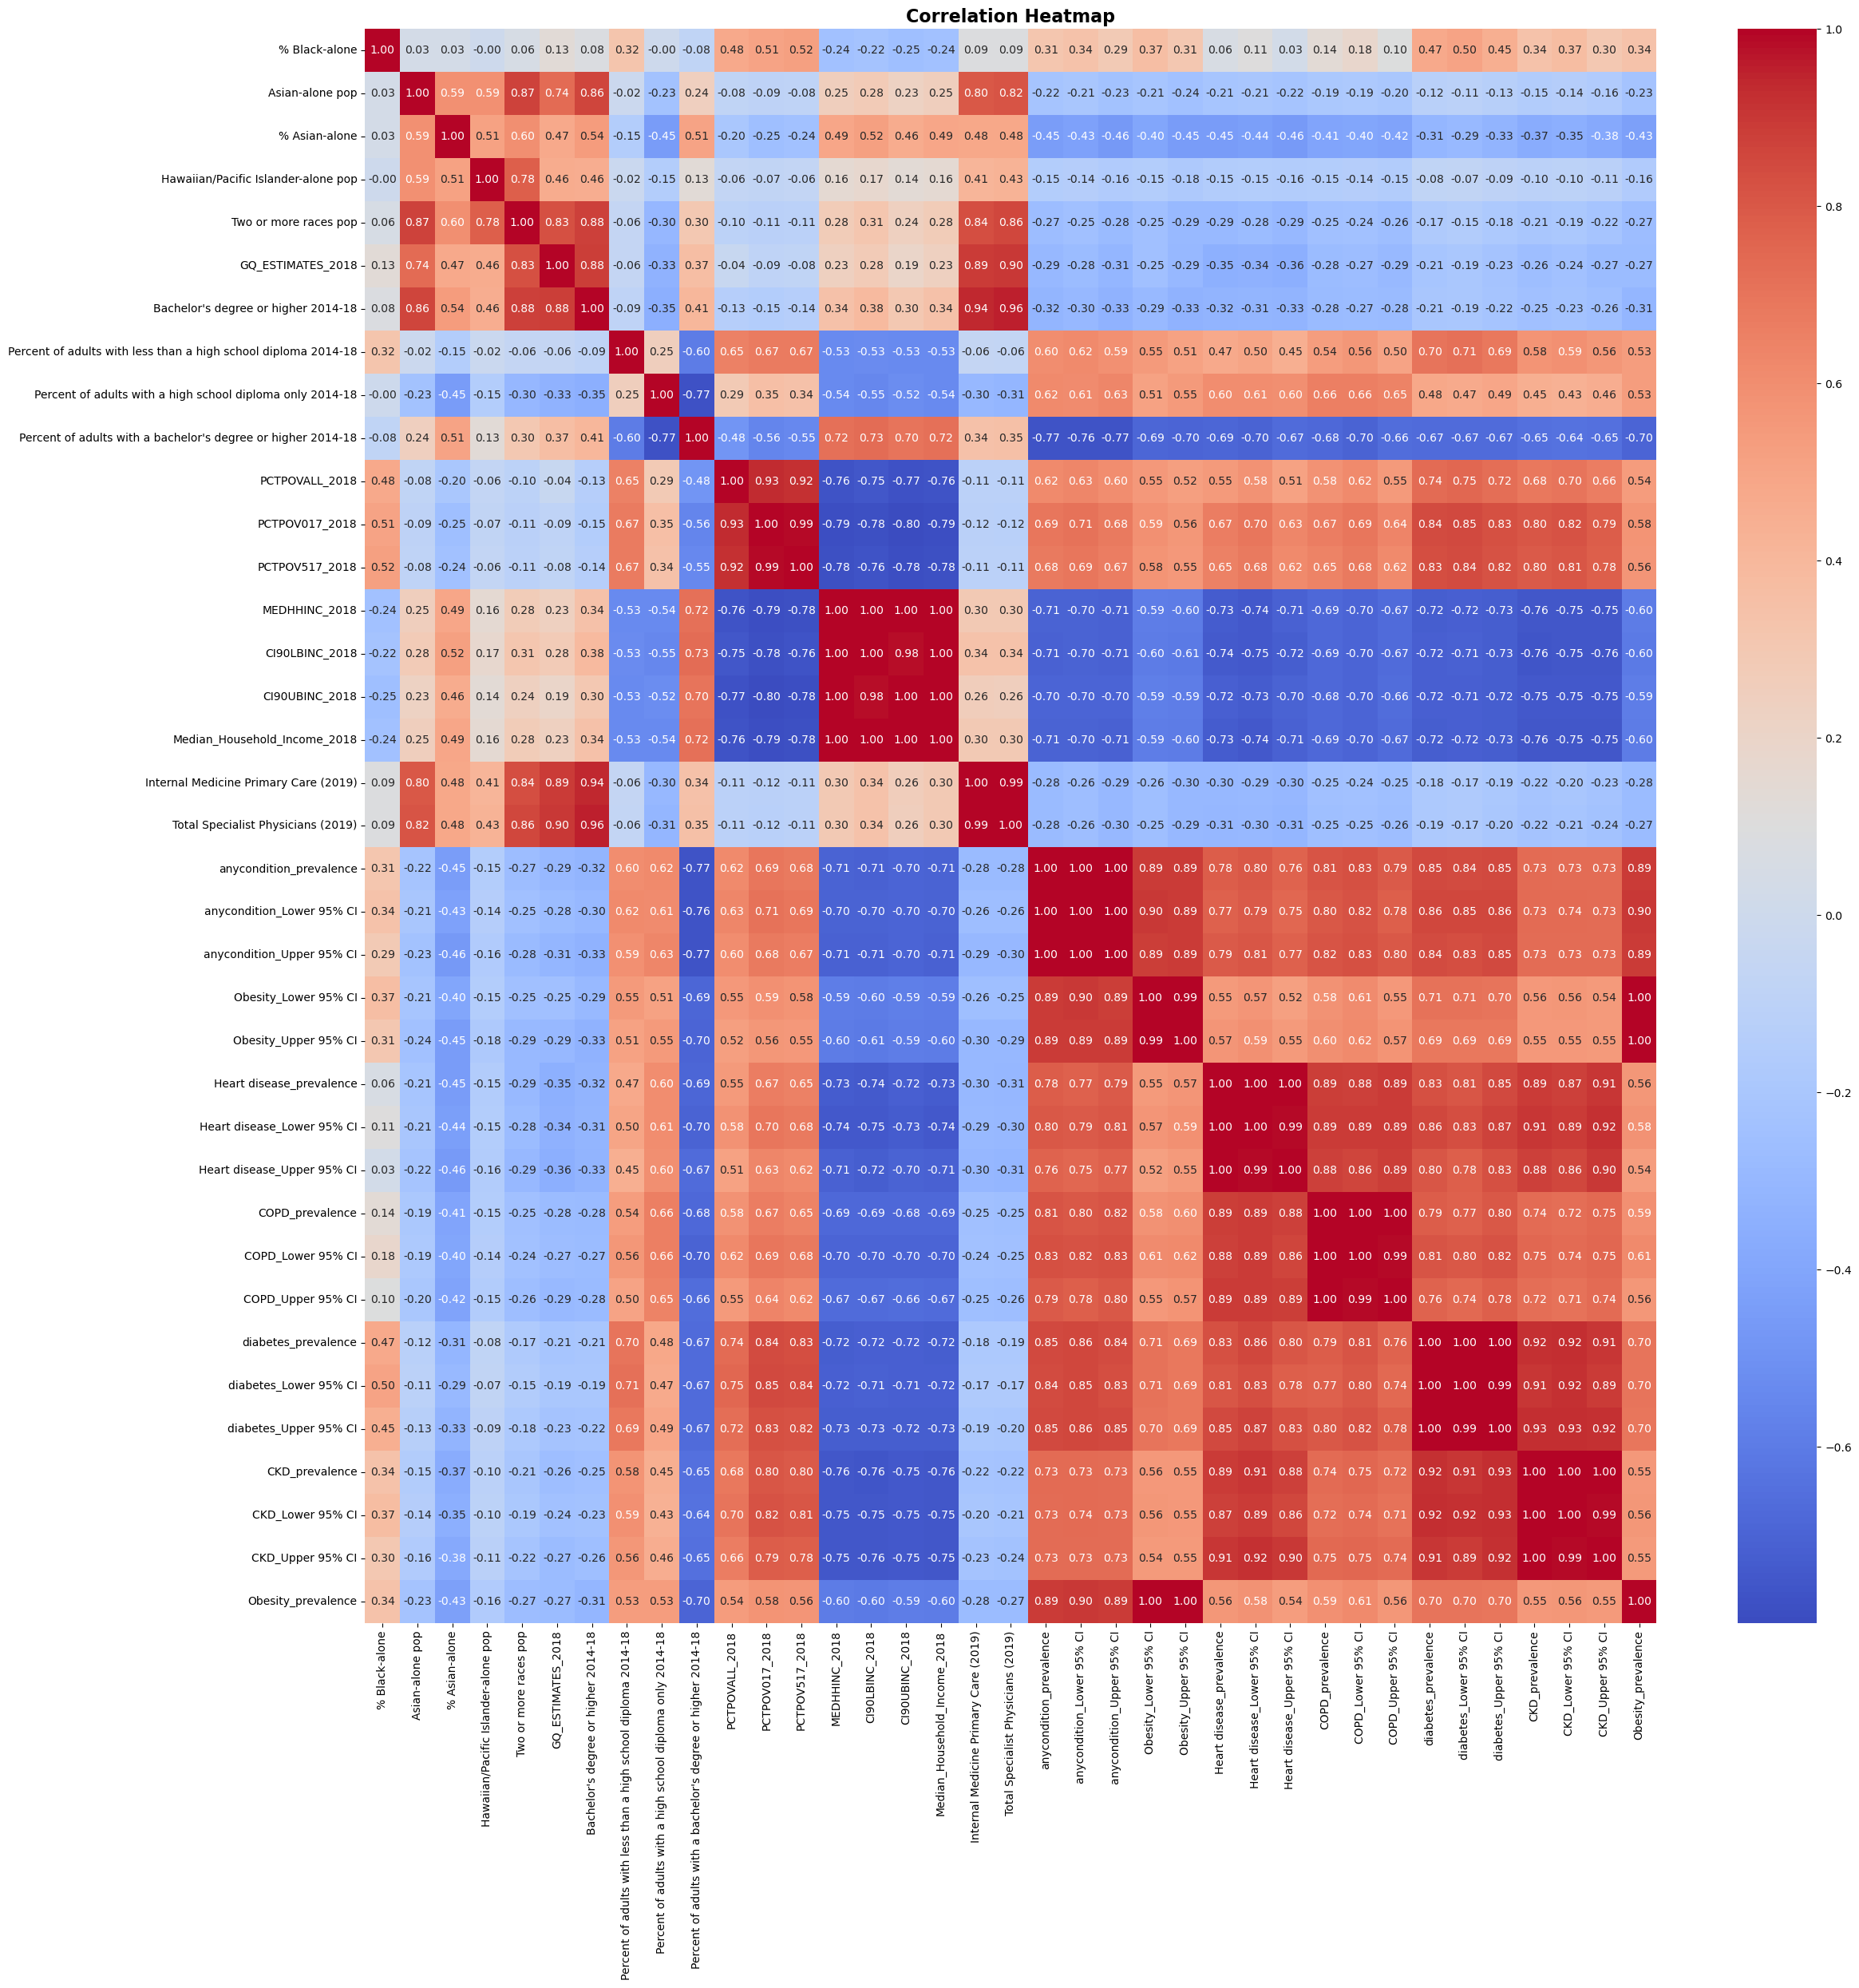

In [71]:
# Calculate the correlation matrix
corr_matrix = combo_data.corr()

# Create a figure and axis with a larger figsize for better visualization
fig, ax = plt.subplots(figsize=(25, 25))

# Create a heatmap with annotations, a specified format, and a color map
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", ax=ax)

# Set a more appropriate title for the heatmap
ax.set_title("Correlation Heatmap", fontsize=16, fontweight="bold")

# Improve the layout by adjusting the spacing
plt.tight_layout()

# Display the heatmap
plt.show()

* We can se many coincidences very importants: 1 valour.

#### 5.5.3 Nulls

In [72]:
combo_data.isnull().sum().sort_values(ascending=False)

% Black-alone                                                     0
anycondition_prevalence                                           0
anycondition_Upper 95% CI                                         0
Obesity_Lower 95% CI                                              0
Obesity_Upper 95% CI                                              0
Heart disease_prevalence                                          0
Heart disease_Lower 95% CI                                        0
Heart disease_Upper 95% CI                                        0
COPD_prevalence                                                   0
COPD_Lower 95% CI                                                 0
COPD_Upper 95% CI                                                 0
diabetes_prevalence                                               0
diabetes_Lower 95% CI                                             0
diabetes_Upper 95% CI                                             0
CKD_prevalence                                  

* We havent nulls

# 6. FIT MODEL

#### 6.1 TRAIN AND TEST

In [73]:
# Create a list of numerical variable names excluding the target variable
num_variables = [col for col in combo_data.columns if col != 'Obesity_prevalence']

# Create the feature matrix 'x' by dropping the target variable from the combined data
x = combo_data.drop('Obesity_prevalence', axis=1)

# Create the target variable 'y'
y = combo_data["Obesity_prevalence"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Nombre de los archivos para guardar los conjuntos de entrenamiento y prueba
train_filename = 'train_data.pkl'
test_filename = 'test_data.pkl'

# Guardar los conjuntos de entrenamiento y prueba en archivos
joblib.dump((X_train, y_train), train_filename)
joblib.dump((X_test, y_test), test_filename)

print("Save train and test.")

Save train and test.


#### 6.2 SELECT BEST

In [74]:
# Initialize the SelectKBest instance with k='all'
selection_model = SelectKBest(f_regression, k="all")

# Fit the SelectKBest model to the training data
selection_model.fit(X_train, y_train)

# Get the boolean mask of selected features
ix = selection_model.get_support()

# Transform the training data using the selected features
X_train = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])

# Transform the test data using the selected features
X_test = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[ix])

# Display the head of the transformed training data
X_train.head()

,% Black-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,Two or more races pop,GQ_ESTIMATES_2018,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,...,Heart disease_Upper 95% CI,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI
0,-0.348244,-0.029207,0.380789,-0.011207,0.284155,-0.199063,0.296200,-1.358767,-1.833385,1.964087,...,-2.111575,-1.831970,-1.789063,-1.889635,-1.862576,-1.787620,-1.895542,-2.194211,-2.098934,-2.137909
1,-0.027772,-0.083125,-0.141497,-0.049532,0.094029,-0.057592,0.302694,-0.585511,-0.929601,1.031174,...,-0.392897,-0.211219,-0.304203,-0.129545,-0.394103,-0.414900,-0.337677,-0.433549,-0.393279,-0.343373
2,-0.578835,-0.127267,-0.200388,-0.106109,-0.157276,-0.025542,-0.057577,-1.074714,-0.971314,2.112505,...,-1.017871,-1.064246,-1.166379,-0.971327,-1.568881,-1.558834,-1.506075,-1.137814,-1.151348,-0.995931
3,-0.584304,-0.127974,-0.273781,0.087346,-0.116760,-0.336509,-0.166977,-0.695976,-0.554182,0.151268,...,-2.319900,-1.789319,-1.741164,-1.851372,-1.385322,-1.330047,-1.470669,-2.018145,-1.909417,-1.974770
4,-0.465803,-0.112363,0.546529,-0.075539,-0.182451,-0.179832,-0.180969,-1.043152,-0.526374,0.819149,...,-0.757465,-1.448108,-1.453772,-1.430481,-1.018204,-1.024998,-1.010391,-0.961748,-0.961830,-0.832792


#### 6.3 LINEAL REGRESSION

In [75]:
# Initialize a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict target values on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared (Coefficient of Determination):", r2)

Mean Squared Error: 0.0033029117640645113
R-squared (Coefficient of Determination): 0.9998345567621353


#### 6.4 LASSO MODEL

In [76]:
# Create an instance of the Lasso model with specific parameters
lasso_model = Lasso(alpha=0.01, max_iter=300)

# Initialize the Lasso model with a regularization parameter (alpha) of 0.01 and a maximum number of iterations

# Fit the Lasso model to the training data
lasso_model.fit(X_train, y_train)

# Perform the fitting of the Lasso model using the training data

# Get the features selected by the Lasso model
selected_features = X_train.columns[lasso_model.coef_ != 0]

# Identify the features that the Lasso model considers important
# These are obtained for those features where the coefficients are not equal to zero

# Predict the target values using the fitted Lasso model on the test data
y_pred = lasso_model.predict(X_test)

# Make predictions of the target values using the Lasso model on the test data

# Print the features selected by the Lasso model
print(f"Selected features: {selected_features}")

# Print the features that the Lasso model considers relevant

# Print the Mean Squared Error (MSE) of the predictions
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")

# Print the coefficient of determination (R-squared) of the predictions
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Selected features: Index(['% Asian-alone', 'Obesity_Lower 95% CI', 'Obesity_Upper 95% CI'], dtype='object')
Mean squared error: 0.0035644608318578927
Coefficient of determination: 0.9998214557386362


c:\Users\Password\Desktop\Instalacion\Anacondas\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.045e+01, tolerance: 5.150e+00
  model = cd_fast.enet_coordinate_descent(


# 7 SAVE MODEL

In [77]:
# Save model
filename = 'linear_regression_model.pkl'
joblib.dump(model, filename)

print("Yeah!.")

Yeah!.
